In [1]:
%cd "C:\Users\LENOVO1\OneDrive\Desktop\PLACEMENTS\MACHINE LEARNING"

C:\Users\LENOVO1\OneDrive\Desktop\PLACEMENTS\MACHINE LEARNING


## Goal of the project
In today's world usage of energy is increasing rapidly. Due to more consumption of energy in some parts of the world, we are facing a lack of energy and it leads to environmental pollution. In some of the places, we have observed outrageous energy consumption in home appliances, So our main goal of this project is to analyse what the factors are affecting the increasing energy consumption of home appliances, how we can reduce the energy consumption of home appliances, and predict energy consumption of appliances by using regression models.

## Table of Content
#### - Step 1: Importing the relevant libraries
#### - Step 2: Data Inspection
#### - Step 3: Exploratory Data Analysis
#### - Step 4: Feature Selection
#### - Step 5: Feature Engineering
#### - Step 6: Train and Test split
#### - Step 7: Model Training
#### - Step 8: Cross Validation
#### - Step 9: Model Explainability
#### - Step 10: Conclusion

In [2]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


## Importing the relevant libraries

In [3]:
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV

Loading Dataset

In [4]:
df=pd.read_csv('energydata.csv')

In [5]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,2016-01-11 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Checking shape of dataset
Here 1st value counts number of datapoints and second value represents the number of features in the dataset

In [6]:
df.shape

(19735, 29)

In our dataset 29 columns and 19735 rows are present

## Data set information

- 1) Date time year-month-day hour:minute:second
- 2) Appliances, energy use in Wh
- 3) Lights, energy use of light fixtures in the house in Wh
- 4) T1, Temperature in kitchen area, in Celsius
- 5) RH_1, Humidity in kitchen area, in %
- 6) T2, Temperature in living room area, in Celsius
- 7) RH_2, Humidity in living room area, in %
- 8)T3, Temperature in laundry room area
- 9) RH_3, Humidity in laundry room area, in %
- 10) T4, Temperature in office room, in Celsius
- 11) RH_4, Humidity in office room, in %
- 12) T5, Temperature in bathroom, in Celsius
- 13) RH_5, Humidity in bathroom, in %
- 14) T6, Temperature outside the building (north side), in Celsius
- 15) RH_6, Humidity outside the building (north side), in %
- 16) T7, Temperature in ironing room , in Celsius
- 17) RH_7, Humidity in ironing room, in %
- 18) T8, Temperature in teenager room 2, in Celsius
- 19) RH_8, Humidity in teenager room 2, in %
- 20) T9, Temperature in parents room, in Celsius
- 21) RH_9, Humidity in parents room, in %
- 22) To, Temperature outside (from Chievres weather station), in Celsius
- 23) Pressure (from Chievres weather station), in mm Hg
- 24) RH_out, Humidity outside (from Chievres weather station), in %
- 25) Wind speed (from Chievres weather station), in m/s
- 26) Visibility (from Chievres weather station), in km
- 27) Tdewpoint (from Chievres weather station), Â°C
- 28) rv1, Random variable 1, nondimensional
- 29) rv2, Random variable 2, nondimensional

## Data Inspection

### Checking all the data types of our dataset holds

In [7]:
# checking dtypes of data
df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

Except date column , remaining columns are numerical feature

### Display the complete summary of the dataset

df.info() gives the summary of dataframe including datatypes , shape and memory storage

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

### Checking columns in our dataset

In [9]:
list(df.columns)

['date',
 'Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2']

### Checking statistics part of our data i.e. mean, standard deviation and so on
to know more about the dataset we are using the df.describe() which by default gives statistical information of all numeric features in our dataframe

In [10]:
# checking statistical info of data
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


###  From the statistical part of our data we can observe
- Max energy usage of appliance is 1080 Wh and min is 10 Wh.
- Light column having majority of the data as 0 value.
- Max pressure outside house is 772.3 mm_hg
- Except the date column there is none catergorical column in the dataset.
- Average temperature outside is about 7.5 degrees. While it ranges from -6 to 28 degress.

- There is no null or missing values.

- Average humidity outside is higher than average humidity inside.
- Max wind speed is 14 m/s.

### Categorical features statistics details
With the help of below argument we can mention categorical columns, it will show summary of all the categorical features too.

In [11]:
df.describe(include=['O'])

,date
count,19735
unique,19735
top,2016-05-18 00:40
freq,1


## Exploratory Data Analysis

### Cheking distribution of target variable

((array([-3.975457  , -3.75912873, -3.6407481 , ...,  3.6407481 ,
          3.75912873,  3.975457  ]),
  array([  10,   10,   10, ...,  910, 1070, 1080], dtype=int64)),
 (77.84427315197463, 97.69495819609833, 0.7591443903885943))

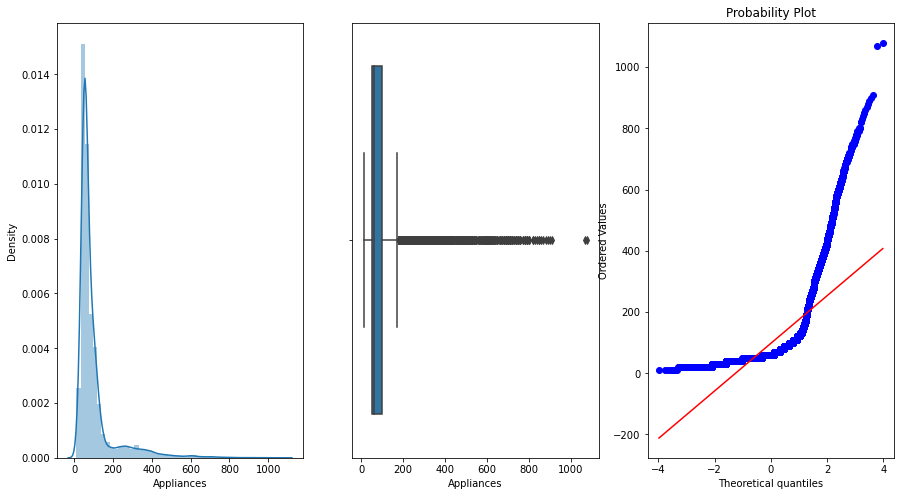

In [12]:
fig,ax=plt.subplots(1,3, figsize=(15,8))
sns.distplot(df.Appliances, ax=ax[0]) #overall distribution of continuous data varibles
sns.boxplot(df.Appliances, ax=ax[1])
stats.probplot(df.Appliances, plot=plt)

Dependent variable is right skewed and lot of outliers are present in our data set

In [13]:
# Checking Skewness
df['Appliances'].skew()

3.3863672147430632

Observation-

So our graph is movig towards y-axis as it is positively skewed and we couldn't get any better visualization with these type of graphs. So,It is better to take Log or Square Root or Exponential of the dependent variable to draw the graph.

## Using transformation method on dependent variable

((array([-3.975457  , -3.75912873, -3.6407481 , ...,  3.6407481 ,
          3.75912873,  3.975457  ]),
  array([  10,   10,   10, ...,  910, 1070, 1080], dtype=int64)),
 (77.84427315197463, 97.69495819609833, 0.7591443903885943))

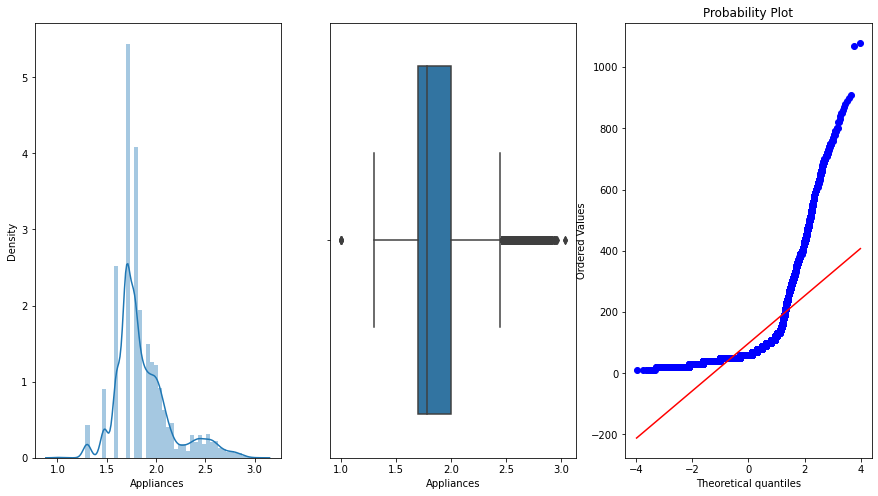

In [14]:
fig,ax=plt.subplots(1,3, figsize=(15,8))
sns.distplot(np.log10(df.Appliances),ax=ax[0])
sns.boxplot(np.log10(df.Appliances),ax=ax[1])
stats.probplot(df.Appliances,plot=plt)

Observation-

log10 transformation gives almost normal distribution 

In [15]:
# checking skewness
np.log10(df['Appliances']).skew()

1.1658168888065423

Observation-

We observe that none of the transformations is making our target variable perfectly normally distributed, but still log transformation is giving better results as compared to others.

The log Transformation has kind of converted the feature to almost normally distributed. Most of the data points are also falling on the line in the Q-Q plot. So we will be applying log transformation on the target variable.

## Checking distribution of all features

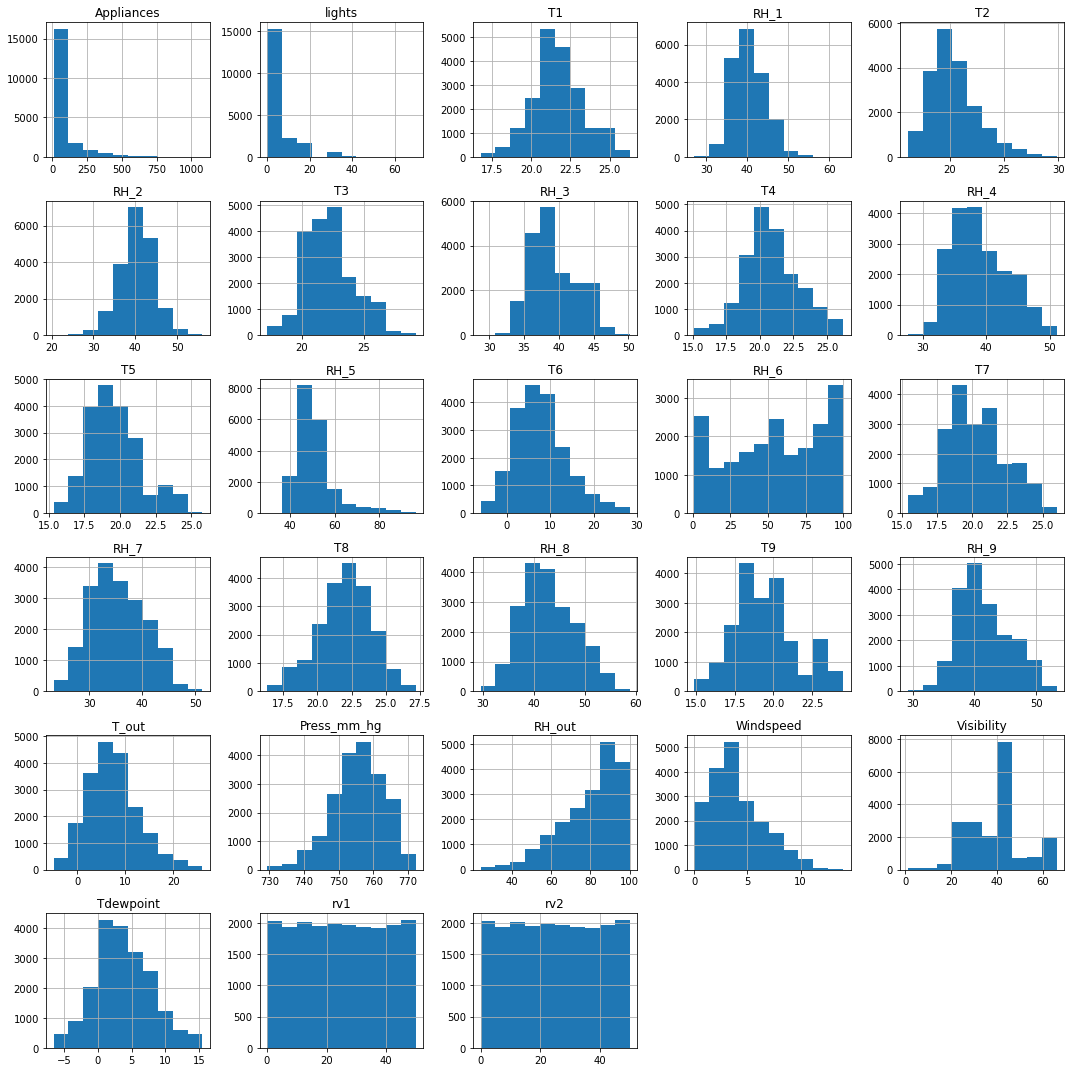

In [16]:
# freq distribution of all data
fig,ax=plt.subplots(figsize=(15,15))
pd.DataFrame.hist(data=df,ax=ax)
plt.tight_layout()

Observation-

Except lights, RH6 , RH _out, light, Appliances, windspeed, rv1, rv2 columns all the remaining columns are normally distributed.

In [17]:
df.skew()

Appliances     3.386367
lights         2.195155
T1             0.120917
RH_1           0.465774
T2             0.889658
RH_2          -0.268247
T3             0.450777
RH_3           0.467589
T4             0.170384
RH_4           0.444614
T5             0.558220
RH_5           1.866820
T6             0.597471
RH_6          -0.241961
T7             0.254722
RH_7           0.242141
T8            -0.256151
RH_8           0.308036
T9             0.382711
RH_9           0.368937
T_out          0.534302
Press_mm_hg   -0.420442
RH_out        -0.922997
Windspeed      0.859982
Visibility     0.441554
Tdewpoint      0.239975
rv1            0.004945
rv2            0.004945
dtype: float64

Observation-

Positively skewed(>1):- Appliances, RH_5.

Moderately Positively skewed(0.5 to 1):- T2, T5, T6, T_out, RH_out, Windspeed.

Normal Distributed(-0.5 to +0.5):- T1, T3, T4, T7, T8, T9, RH_1, RH_2, RH_3, RH_4, RH_6, RH_7, RH_8, RH_9, Press_mm_hg, Visibility, Tdewpoint, rv1, rv2,

Negative skewed(-0.5 to -1):- No features.

Moderately Negtively skewed(>-1):- RH_out.

## Checking relation between all the variables


array([[<AxesSubplot:xlabel='Appliances', ylabel='Appliances'>,
        <AxesSubplot:xlabel='lights', ylabel='Appliances'>,
        <AxesSubplot:xlabel='T1', ylabel='Appliances'>,
        <AxesSubplot:xlabel='RH_1', ylabel='Appliances'>,
        <AxesSubplot:xlabel='T2', ylabel='Appliances'>,
        <AxesSubplot:xlabel='RH_2', ylabel='Appliances'>,
        <AxesSubplot:xlabel='T3', ylabel='Appliances'>,
        <AxesSubplot:xlabel='RH_3', ylabel='Appliances'>,
        <AxesSubplot:xlabel='T4', ylabel='Appliances'>,
        <AxesSubplot:xlabel='RH_4', ylabel='Appliances'>,
        <AxesSubplot:xlabel='T5', ylabel='Appliances'>,
        <AxesSubplot:xlabel='RH_5', ylabel='Appliances'>,
        <AxesSubplot:xlabel='T6', ylabel='Appliances'>,
        <AxesSubplot:xlabel='RH_6', ylabel='Appliances'>,
        <AxesSubplot:xlabel='T7', ylabel='Appliances'>,
        <AxesSubplot:xlabel='RH_7', ylabel='Appliances'>,
        <AxesSubplot:xlabel='T8', ylabel='Appliances'>,
        <AxesSubplot:x

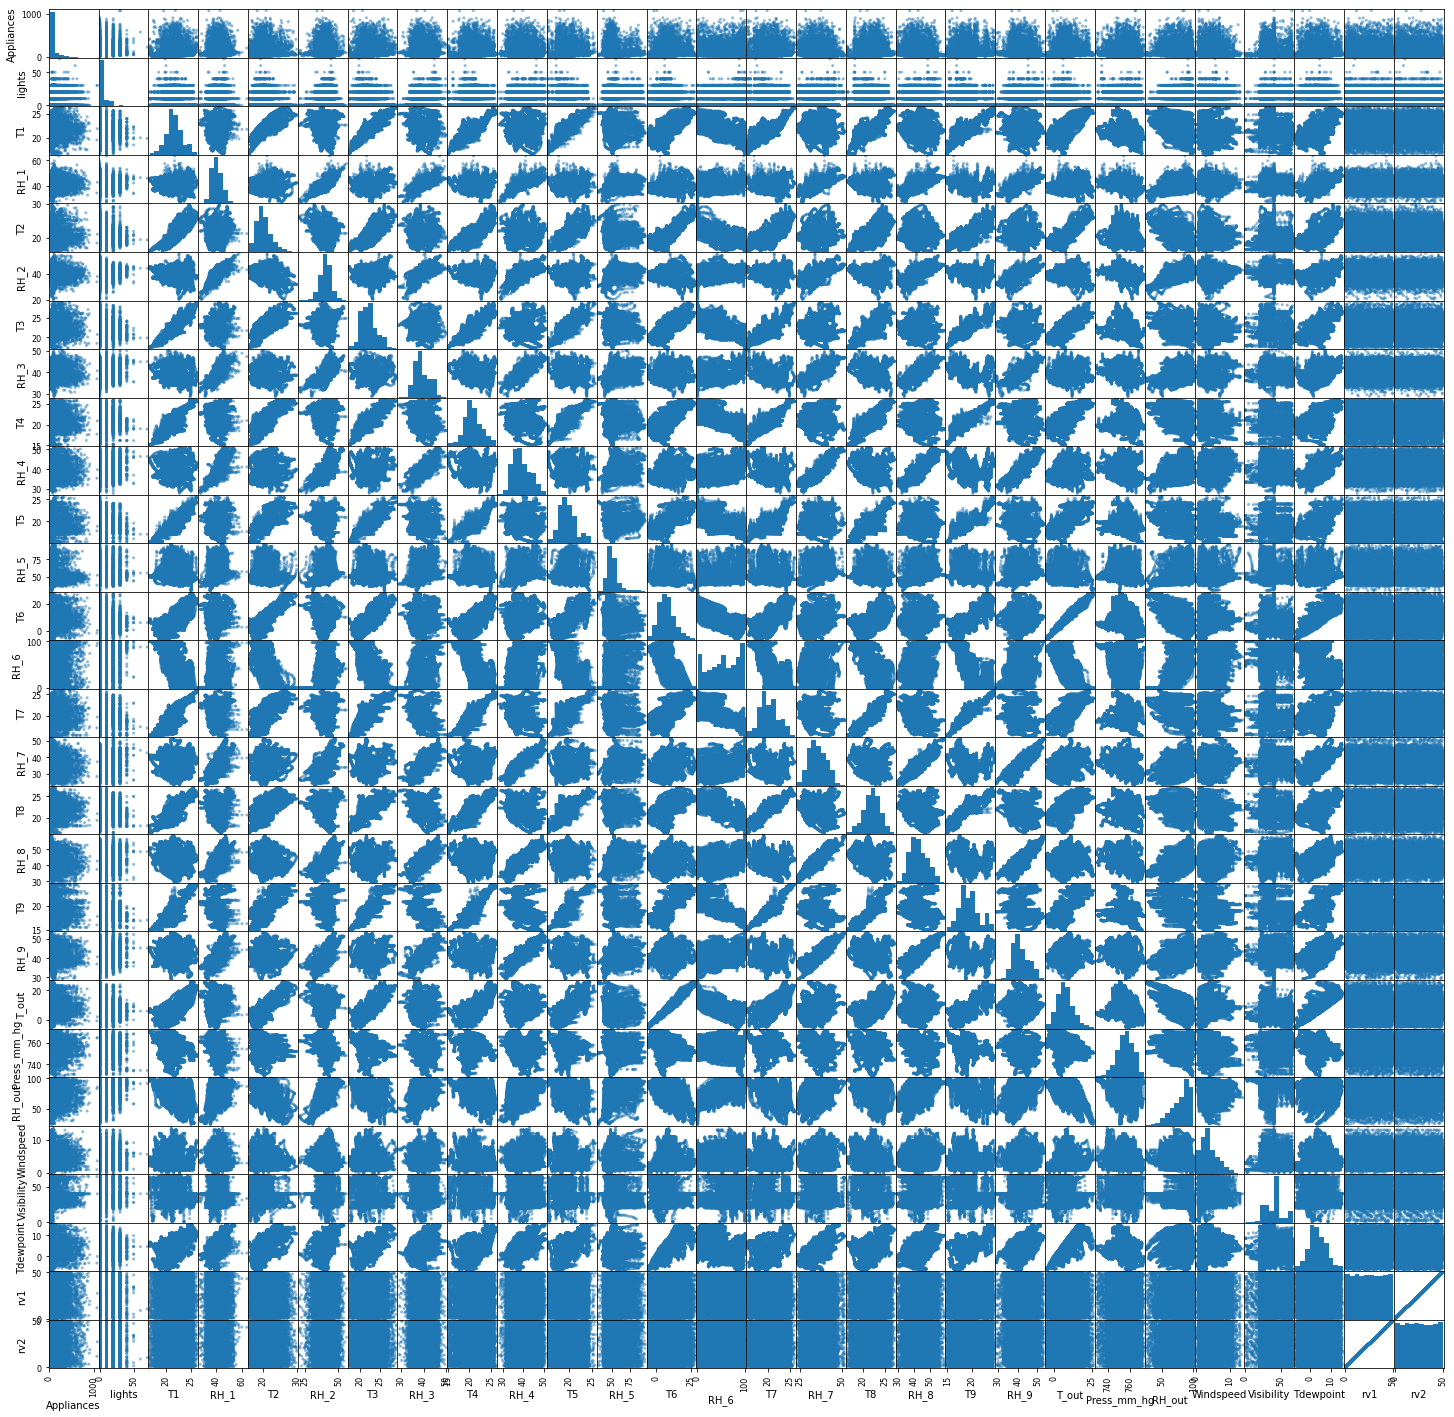

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(25,25))

Except the light feature all the remaining features are linearly correlated, so we need to remove this light feature.

## # Converting dates column to numerical
The idea is that appliances' load is hourly, daily, weekly, monthly dependent. It is a logical assumption that during sleeping hours the energy consumption is low or at weekends the energy consumption is higher than the weekdays because more people are at home.

Additionaly, it is expected that a correlation between temperature/humidity and energy load exist. For instance, when someone cooks(higher consumption) probably the temperature in the kichen raises.

Moreover, we can use qualitative predictors to indicate if a measured load is lower or higher in comparison to the average energy load in a given time interval.

We have also added several columns as new features to the original data, based on the above-mentioned assumptions and then we will find out which of them explains better appliance's consumption of energy.

In [19]:
# extracting date month time from date time columns
df['dates']=pd.to_datetime(df['date'])
df['months']=df['dates'].dt.month
df['hour']=df['dates'].dt.hour

## Energy Consumption vs date

date=df.groupby(df.months)['Appliances'].sum().sort_values(ascending=False)
date

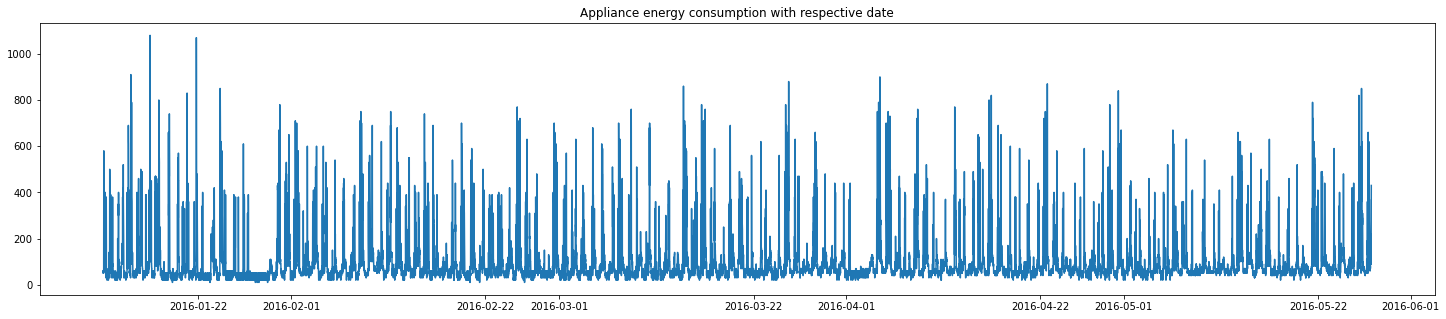

In [20]:
# plotting graph between appliance and dates
plt.figure(figsize=(25,5))
plt.plot(df.dates,df.Appliances)
plt.title("Appliance energy consumption with respective date")
plt.show()

We can clearly see that in the month of March appliances are consuming more energy, on the other hand in the month of January appliances are consuming less energy.

## Energy consumption vs Pressure

In [21]:
pressure=df.groupby(df.months)['Press_mm_hg'].sum().sort_values(ascending=False)
pressure

months
3    3374073.85
4    3259899.30
2    3146144.25
5    2912476.65
1    2217644.50
Name: Press_mm_hg, dtype: float64

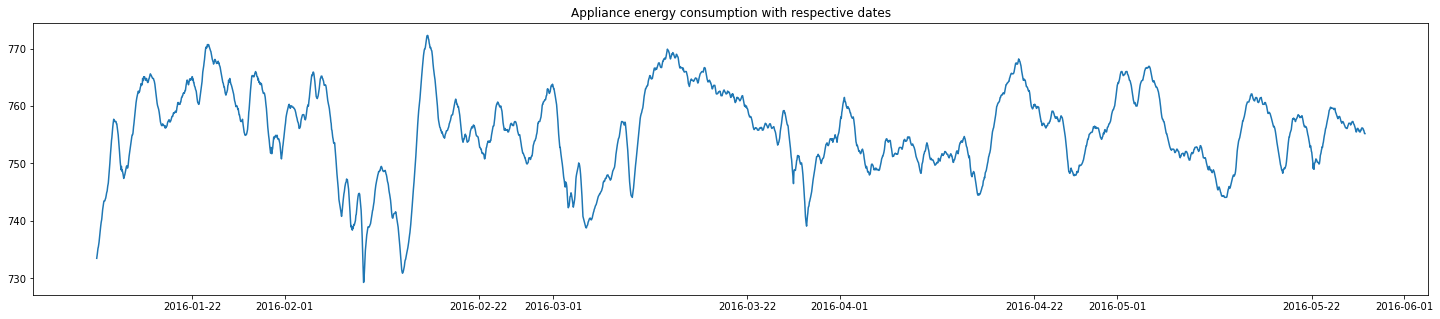

In [22]:
# plotting graph between pressure and dates
plt.figure(figsize=(25,5))
plt.plot(df.dates,df.Press_mm_hg)
plt.title('Appliance energy consumption with respective dates')
plt.show()

March Month having high pressure is recorded and Jan month having lesser pressure recorded, hence we can clearly say pressure have more impact on energy consumption. Whenever there is high pressure it will leads to appliances consuming more energy.

## Energy consumption vs Windspeed


In [23]:
Windspeed=df.groupby(df.months)['Windspeed'].sum().sort_values(ascending=False)
Windspeed

months
2    20244.5
3    17824.0
4    15778.5
1    14012.5
5    11865.0
Name: Windspeed, dtype: float64

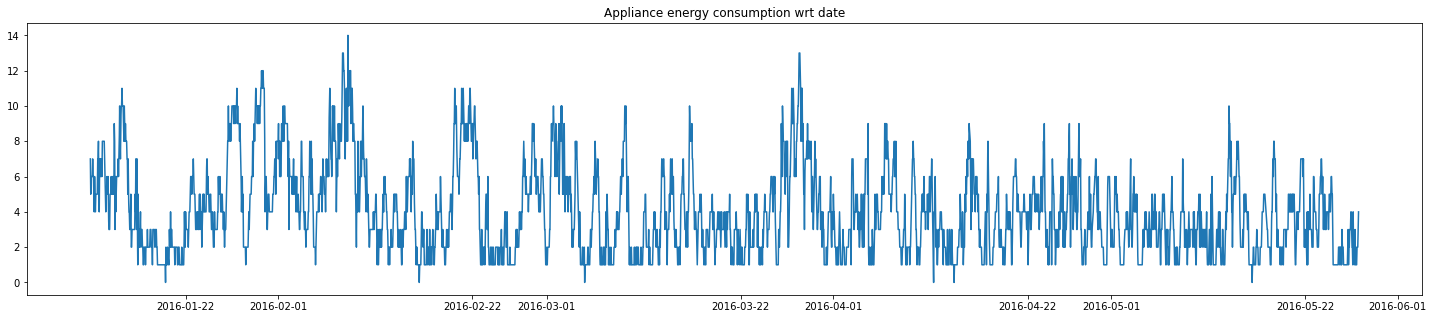

In [24]:
# plotting graph between windspeed and dates
plt.figure(figsize=(25,5))
plt.plot(df.dates,df.Windspeed)
plt.title("Appliance energy consumption wrt date")
plt.show()

In February we see wind speed is high but energy consumption is not high so we can conclude windspeed is not much effective for our target variable.

## Checking which day of week has more energy consumption


In [25]:
# extracting week day
df['week_days']=df['dates'].dt.dayofweek

In [26]:
Week=df.groupby(df.week_days)['Appliances'].sum().sort_values(ascending=False)
Week

week_days
0    309610
4    297650
5    290690
3    260450
6    259690
2    259000
1    250920
Name: Appliances, dtype: int64

Text(0.5, 1.0, 'Energy usage in each day')

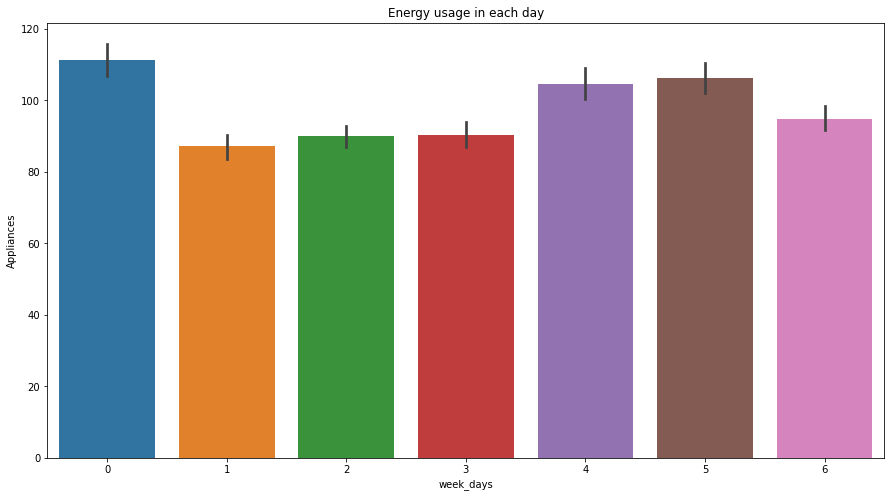

In [27]:
plt.figure(figsize=(15,8))
sns.barplot(df.week_days,df.Appliances)
plt.title("Energy usage in each day")

0=Sunday , Sunday has more energy consumption it means that people spend more time inside home on sunday

## Comparing target variable with all the humidity columns

In [28]:
humidity_column=df[['RH_1', 'RH_2','RH_3','RH_4','RH_5', 'RH_6','RH_7','RH_8','RH_9']]


In [29]:
# plotting lineplot for all the humidity columns
def line_plot(features):
    plt.figure(figsize=(15,8))
    for i in features:
        sns.lineplot(df.Appliances,humidity_column[i],label=i)
    plt.show()        

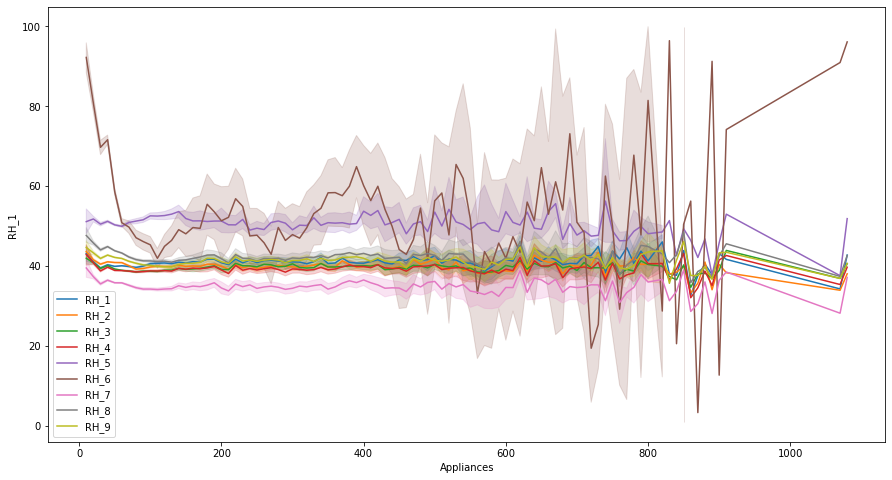

In [30]:
features=humidity_column.columns
line_plot(features)

RH_6 humidity feature is outside humidity of house , it has high variation in the values mostle because of outside pressure,temp

## Comparing target variable with all the temp columns


In [31]:
temp_column=df[['T1','T2','T3','T4','T5', 'T6', 'T7',  'T8','T9']]


In [32]:
# plotting lineplot for all the temp columns
def line_plot(features):
    plt.figure(figsize=(15,8))
    for i in features:
        sns.lineplot(df.Appliances, temp_column[i],label=i)
        
    plt.show()    

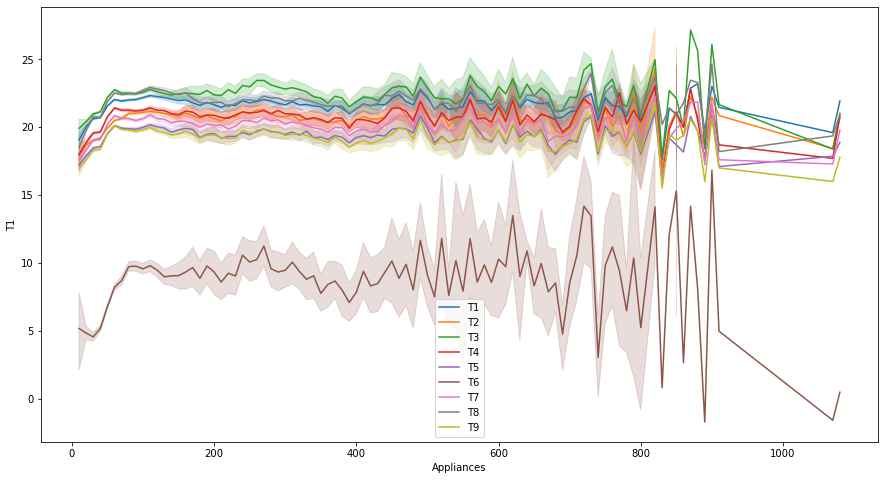

In [33]:
features=temp_column.columns
line_plot(features)

Except t6 all the temp inside house are almost constant during each day but outside temp is having so much variation maybe because of season,pressure, windspeed variation.

## Comparing taret variable with features calculated by weather station

In [34]:
weather_station_column=df[['T_out', 'Press_mm_hg', 'RH_out', 'Windspeed','Visibility', 'Tdewpoint' ]]


In [35]:
# plotting lineplot for all the weather station columns
def line_plot(features):
    plt.figure(figsize=(15,8))
    for i in features:
        sns.lineplot(df.Appliances, weather_station_column[i],label=i)
    plt.show()    

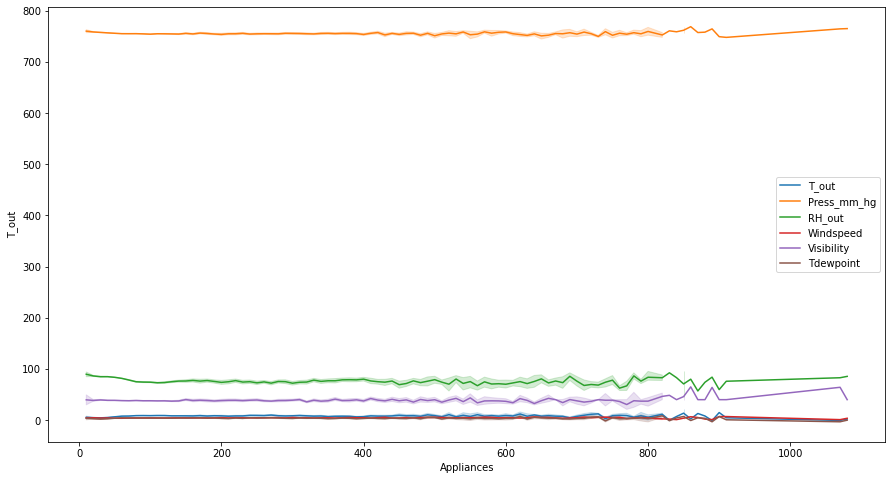

In [36]:
features=weather_station_column.columns
line_plot(features)

All the features have constant values during each day

## Checking hour vs Power consume

<AxesSubplot:xlabel='hour', ylabel='Appliances'>

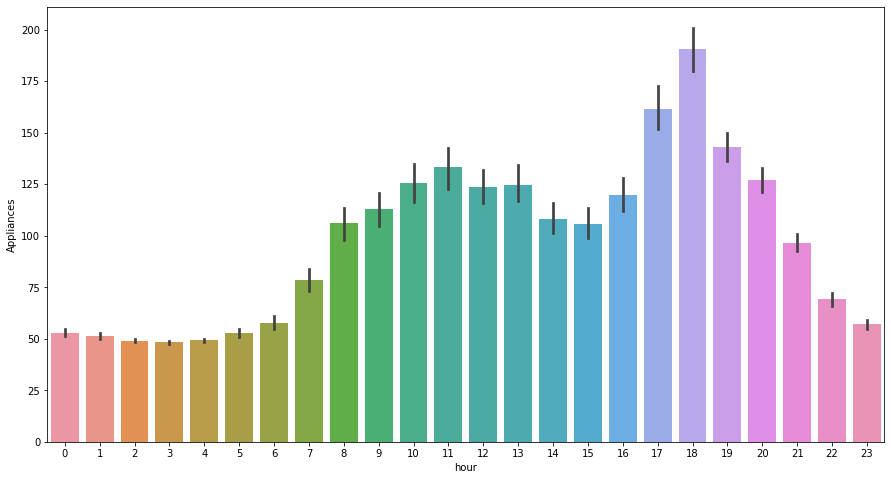

In [37]:
plt.figure(figsize=(15,8))
sns.barplot(df.hour,df.Appliances)

Observation-

Above chart show the average distribution of energy consumed throughout the day for 4.5 months. We can clearly see that there are two peaks one at 11:00 AM which is shallow and low and the other one at 06:00 PM in the evening which is sharper as well as higher.

During sleeping hours (10:00PM to 06:00AM) energy consumption is less about 50 Wh. After about 6 AM, energy consumption starts to rise gradually up until 11 AM (probably due to morning chores). And then gradually decreases to around 100 Wh at about 3 PM. After which the energy consumption drastically shoots up up until 6 PM in the evening (probably due to requirement lights in rooms). However energy consumption of appliances reverts back to 50 Wh, as night approaches and people in the house go to bed at around 10 PM.



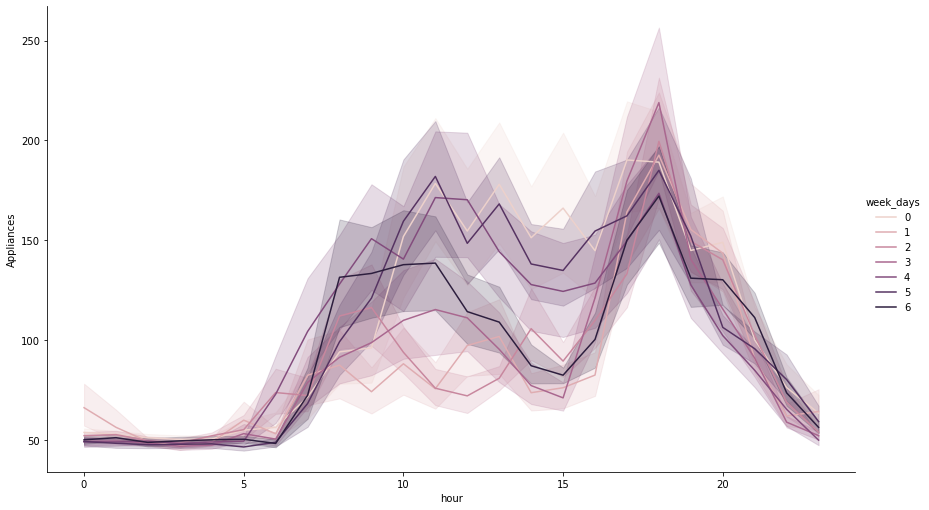

In [38]:
sns.relplot(y='Appliances', x='hour', data=df, kind='line', hue='week_days', height=7, aspect=1.7)
plt.show()

We see that everyday the usage is maximum for around 15 hours. But on 5th and 6th day, it is even higher during the same hours.

## Feature Selection


In [39]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,dates,months,hour,week_days
0,2016-01-11 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016-01-11 17:00:00,1,17,0
1,2016-01-11 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016-01-11 17:10:00,1,17,0
2,2016-01-11 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016-01-11 17:20:00,1,17,0
3,2016-01-11 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,92.0,6.000000,51.500000,5.0,45.410390,45.410390,2016-01-11 17:30:00,1,17,0
4,2016-01-11 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016-01-11 17:40:00,1,17,0


In [40]:
# removing dates column
df.drop('dates',axis=1,inplace=True)

date dropping reason : As we are not trying to analyze the problem as time series rather we will analyze it through regression on 'Appliance' column

In [41]:
df.drop('date',axis=1,inplace=True)

In [42]:
df.shape

(19735, 31)

In [43]:
# removing light column
df.drop('lights',axis=1,inplace=True)

In [44]:
df

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,months,hour,week_days
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433,1,17,0
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195,1,17,0
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668,1,17,0
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390,1,17,0
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097,1,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812,5,17,4
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940,5,17,4
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117,5,17,4
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784,5,17,4


## Variance Threshold Removal
using this method we can check which columns have constant values.

In [45]:
from sklearn.feature_selection import VarianceThreshold

In [46]:
# implementation variance threshold
variance_threshold= VarianceThreshold(threshold=0)
variance_threshold.fit(df)
variance_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

Here is no column in our data set having constant values

## Feature selection for numerical features using f_regression

In [47]:
# importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [48]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [49]:
# finding the f score of eachfeatures
f_scores=f_regression(X,Y)
f_scores

(array([6.08546649e+01, 1.47140998e+02, 2.88664211e+02, 7.24083194e+01,
        1.43812455e+02, 2.60243942e+01, 3.20699643e+01, 5.68130298e+00,
        7.70780064e+00, 9.54444047e-01, 2.76909655e+02, 1.37474160e+02,
        1.31448883e+01, 6.12846635e+01, 3.09491920e+01, 1.76061071e+02,
        1.97755919e+00, 5.23984346e+01, 1.95934318e+02, 2.40433596e+01,
        4.68470558e+02, 1.50924181e+02, 1.04712660e-03, 4.65465753e+00,
        2.45132436e+00, 2.45132436e+00, 2.65830480e+00, 9.73160402e+02,
        1.84831825e-01]),
 array([6.44916932e-015, 9.63943137e-034, 2.78494651e-064, 1.87302216e-017,
        5.08641643e-033, 3.40254020e-007, 1.50788109e-008, 1.71560296e-002,
        5.50345126e-003, 3.28602654e-001, 9.33386723e-062, 1.20948068e-031,
        2.89030223e-004, 5.18729573e-015, 2.68310258e-008, 5.21156618e-040,
        1.59663524e-001, 4.69710926e-013, 2.62470120e-044, 9.49392220e-007,
        1.07751628e-102, 1.45647106e-034, 9.74185818e-001, 3.09814411e-002,
        1.1744

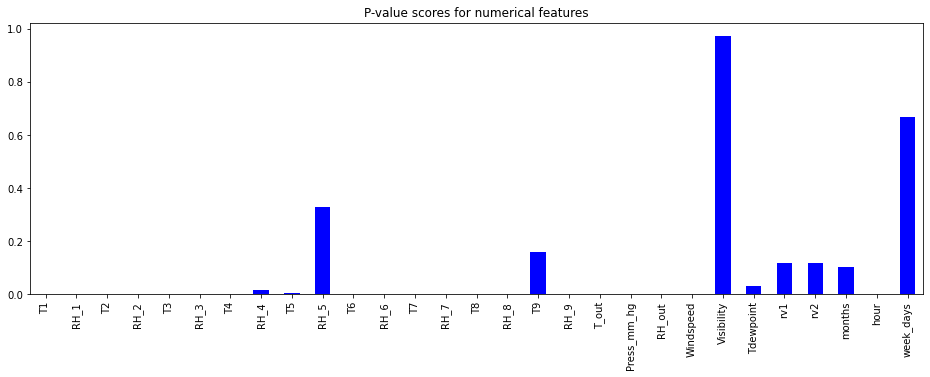

In [50]:
# the second array consists of p_values that we need
p_values=pd.Series(f_scores[1],index=X.columns)
p_values.plot(kind='bar',color='blue',figsize=(16,5))
plt.title('P-value scores for numerical features')
plt.show()

T9, RH_4, RH_5, months, Tdewpoint, Visibility, rv1, rv2 and week_days columns are highlighted ,we need to remove these columns as these have high P-value.

In [51]:
# dropping 9 columns
df.drop(['T9',"RH_4",'RH_5','months','Visibility','Tdewpoint','rv1',"rv2","week_days"],axis=1,inplace=True)


In [52]:
df.shape

(19735, 21)

## Correlation Feature Selection

<AxesSubplot:>

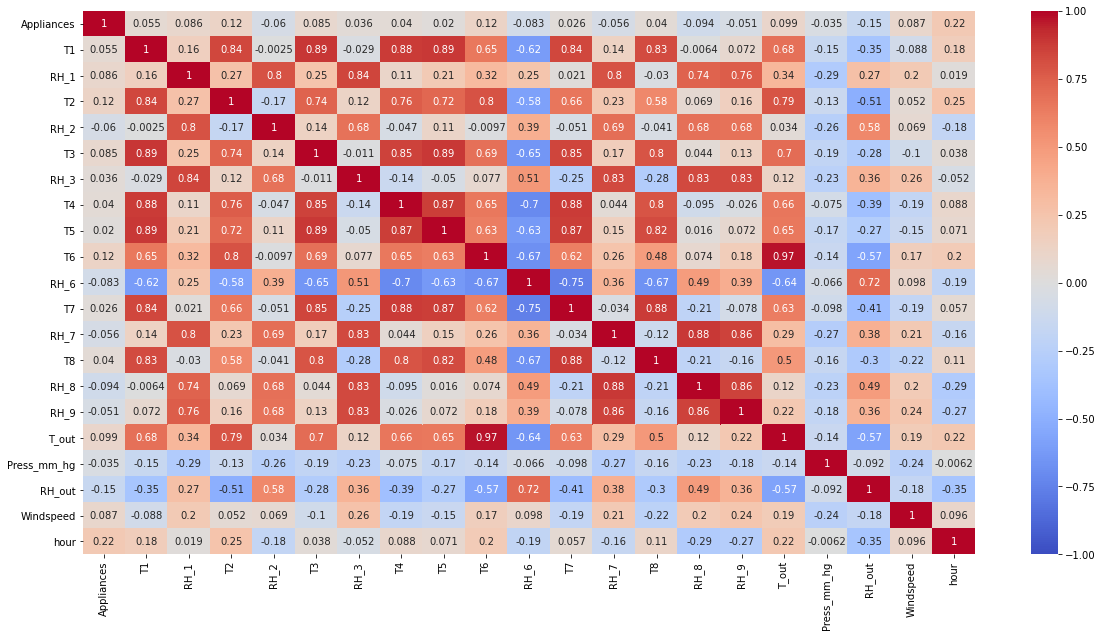

In [53]:
# checking correlation with all columns using heat map
corrmat=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corrmat,vmin=-1,annot=True,cmap='coolwarm')
# plt.title('heatmap of data',fontsize=15)
# plt.show()

Observations based on correlation plot:-

Temperature - All the temperature variables from T1-T8 and T_out have positive correlation with the target Appliances .

For the indoor temperatures, the correlations are high as expected, since the ventilation is driven by the HRV unit and minimizes air temperature differences between rooms.

T6 & T_Out has high correlation(both temperatures from outside) . Hence T6 can be removed from training set as information provided by them can be provided by other fields.

Weather attributes - Visibility, Tdewpoint, Press_mm_hg have low correlation values

Humidity -There are no significantly high correlation cases (> 0.9) for humidity sensors.

Random variables have no role to play

In [54]:
df.drop('T6',axis=1,inplace=True)

In [55]:
corr_tran_df=df.corr()
corr_tran_df

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,T5,RH_6,T7,RH_7,T8,RH_8,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,hour
Appliances,1.000000,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.019760,-0.083178,0.025801,-0.055642,0.039572,-0.094039,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.216792
T1,0.055447,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.885247,-0.615045,0.838705,0.135182,0.825413,-0.006441,0.071756,0.682854,-0.150574,-0.345481,-0.087654,0.178858
RH_1,0.086031,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.205797,0.245126,0.021397,0.801122,-0.030053,0.736196,0.764001,0.340788,-0.293957,0.274126,0.204932,0.018594
T2,0.120073,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.720550,-0.580372,0.663660,0.229212,0.578191,0.068534,0.157346,0.792247,-0.133028,-0.505291,0.052495,0.254784
RH_2,-0.060465,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.110409,0.389933,-0.051422,0.690584,-0.041023,0.679777,0.676467,0.033703,-0.255646,0.584911,0.069190,-0.183322
T3,0.085060,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.888169,-0.647672,0.847374,0.172624,0.795283,0.044427,0.134602,0.699420,-0.189974,-0.281718,-0.100776,0.037624
RH_3,0.036292,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,-0.050062,0.514912,-0.250090,0.832685,-0.283228,0.828822,0.833538,0.118237,-0.233274,0.356192,0.263188,-0.052392
T4,0.040281,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,0.871813,-0.703149,0.877763,0.043527,0.796256,-0.095192,-0.025549,0.663479,-0.075292,-0.388602,-0.185747,0.088407
T5,0.019760,0.885247,0.205797,0.720550,0.110409,0.888169,-0.050062,0.871813,1.000000,-0.632384,0.870624,0.148905,0.824981,0.016388,0.072308,0.651335,-0.170999,-0.273953,-0.145011,0.071340
RH_6,-0.083178,-0.615045,0.245126,-0.580372,0.389933,-0.647672,0.514912,-0.703149,-0.632384,1.000000,-0.753973,0.357222,-0.665869,0.489580,0.391943,-0.641573,-0.065814,0.718587,0.098317,-0.190277


In [56]:
corr_appliances=corr_tran_df[['Appliances']]
corr_appliances

,Appliances
Appliances,1.000000
T1,0.055447
RH_1,0.086031
T2,0.120073
RH_2,-0.060465
T3,0.085060
RH_3,0.036292
T4,0.040281
T5,0.019760
RH_6,-0.083178


Checking Multicollinearity

In [57]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif=pd.DataFrame()
    vif['variables']=X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)


In [58]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Appliances']]])

,variables,VIF
0,T1,3225.968724
1,RH_1,1651.336954
2,T2,1952.890647
3,RH_2,1894.088196
4,T3,1143.483889
5,RH_3,1443.123774
6,T4,799.535093
7,T5,951.313385
8,RH_6,32.878524
9,T7,1130.755791


In our data set we have more Multicollinearity features present but we are not removing them

## Feature Engineering

Checking duplicate values

In [59]:
len(df[df.duplicated()])

0

No duplicates are there in our dataset

## Checking null values

In [60]:
# checking null values
df.isnull().sum()

Appliances     0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
T5             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
hour           0
dtype: int64

## Checking Outliers

In [61]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
((df<(Q1-1.5*IQR))| (df>(Q3+1.5*IQR))).sum()

Appliances     2138
T1              515
RH_1            146
T2              546
RH_2            235
T3              217
RH_3             15
T4              186
T5              179
RH_6              0
T7                2
RH_7             42
T8               71
RH_8             17
RH_9             21
T_out           440
Press_mm_hg     219
RH_out          239
Windspeed       214
hour              0
dtype: int64

Majority of columns have outliers , so we need to remove them

In [62]:
# Removing Outliers
for i in df.columns:
    if(i=='Appliances'):
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        IQR=Q3-Q1
        
        df=df[(df[i]<(Q3 + 1.5 * IQR))]
        df=df[(df[i]>(Q1 - 1.5 * IQR))]

In [63]:
# checking the outliers
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Appliances     857
T1             437
RH_1           127
T2             473
RH_2           199
T3             117
RH_3            11
T4             204
T5             249
RH_6             0
T7               0
RH_7            37
T8              93
RH_8            18
RH_9            23
T_out          334
Press_mm_hg    189
RH_out         279
Windspeed      224
hour             0
dtype: int64

Most of the outliers are removed

In [64]:
df.shape

(17597, 20)

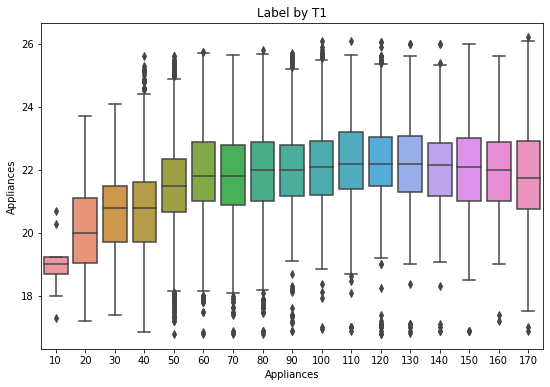

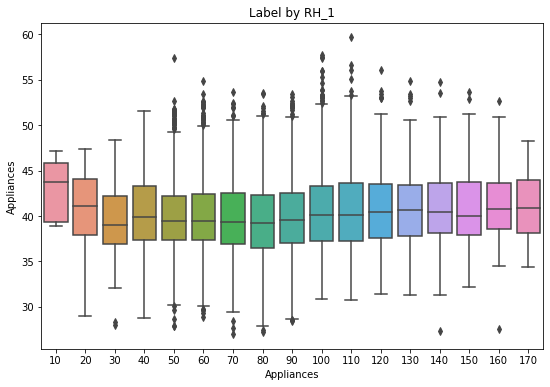

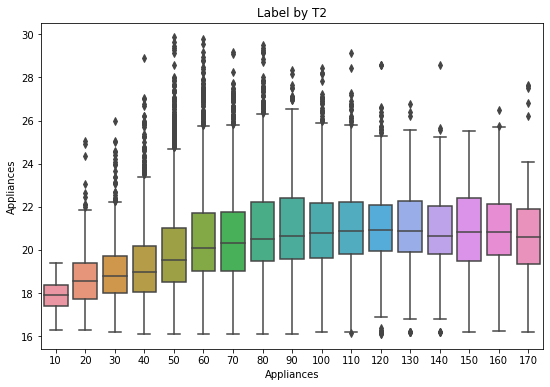

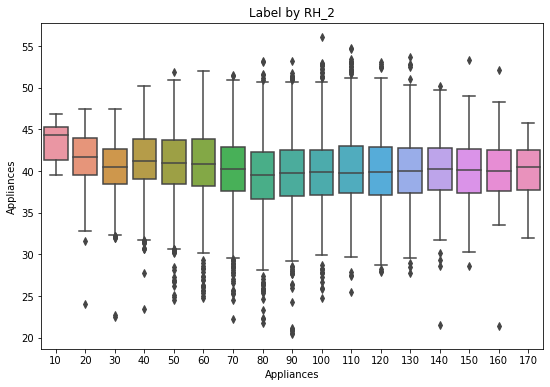

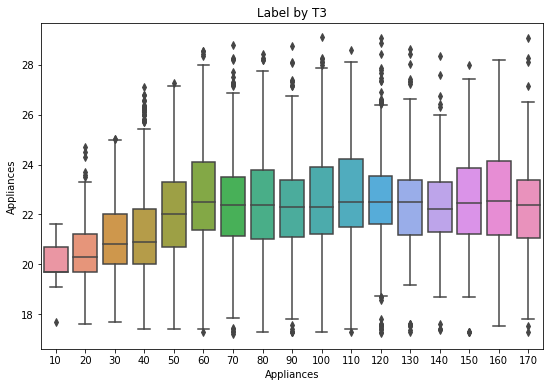

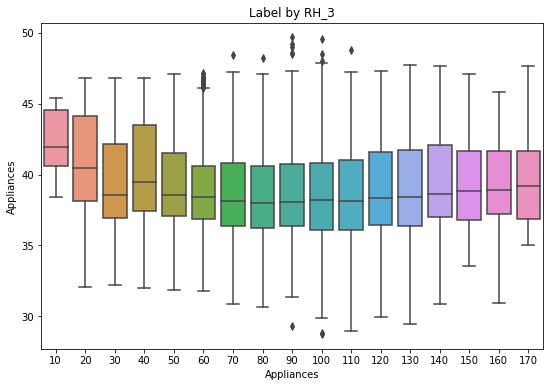

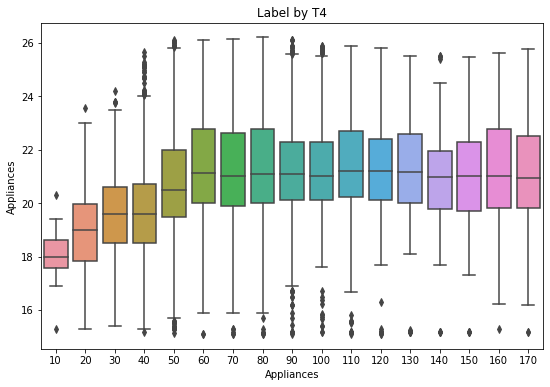

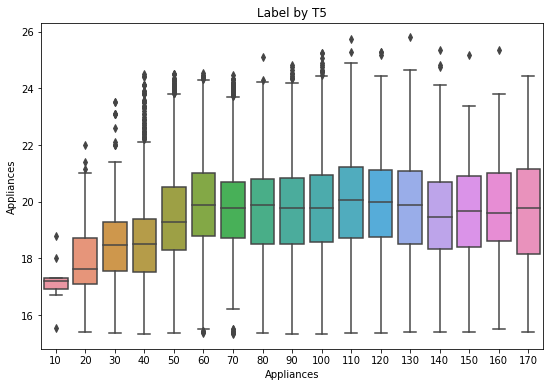

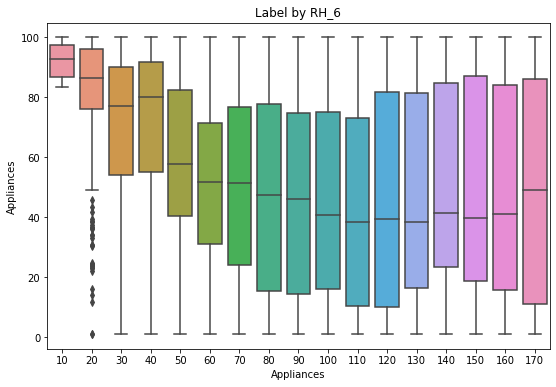

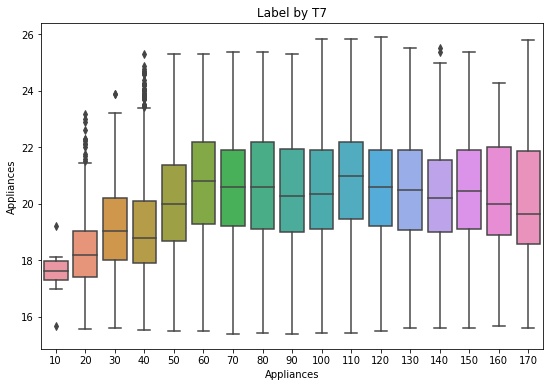

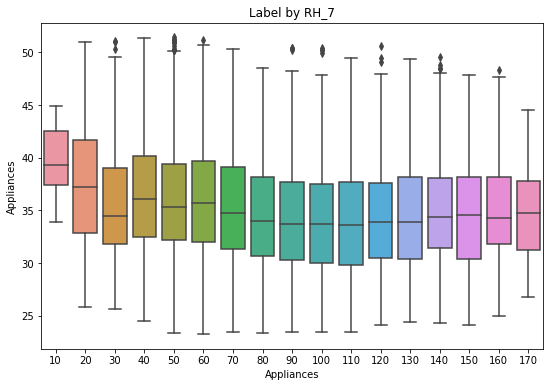

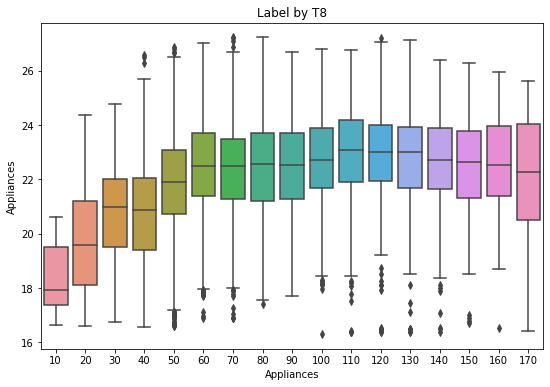

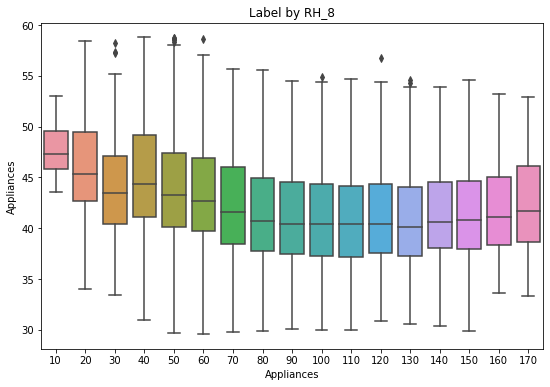

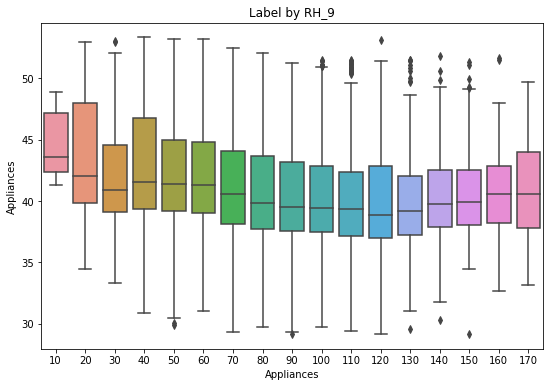

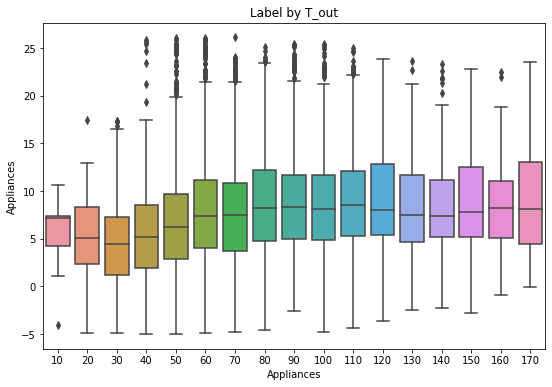

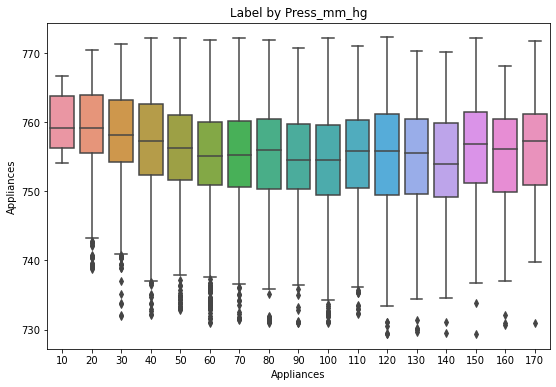

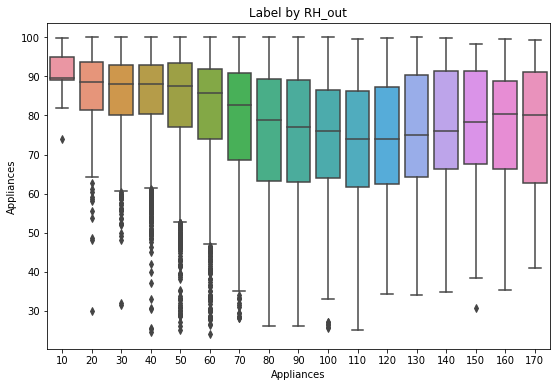

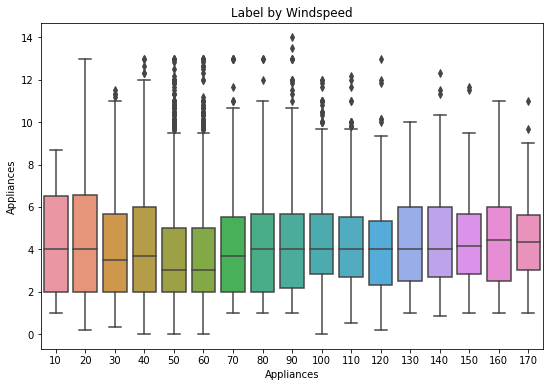

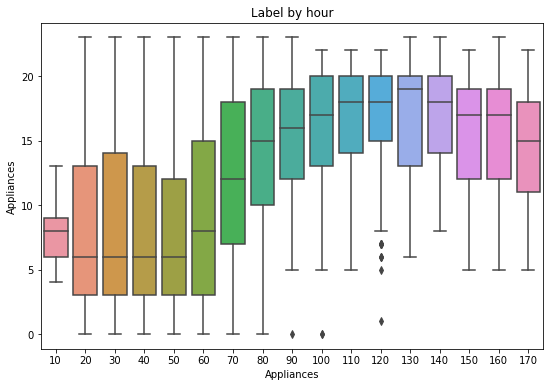

In [65]:
# Plot a boxplot for the label by each column
for col in df.columns:
    if(col!='Appliances'):
        fig = plt.figure(figsize=(9, 6))
        ax = fig.gca()
        sns.boxplot(df['Appliances'], df[col], ax = ax)
        ax.set_title('Label by ' + col)
        ax.set_ylabel("Appliances")
plt.show()

## Test and train split

In [66]:
df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,T5,RH_6,T7,RH_7,T8,RH_8,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,hour
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,17.166667,84.256667,17.200000,41.626667,18.2,48.900000,45.53,6.60,733.5,92.0,7.000000,17
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,17.166667,84.063333,17.200000,41.560000,18.2,48.863333,45.56,6.48,733.6,92.0,6.666667,17
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,17.166667,83.156667,17.200000,41.433333,18.2,48.730000,45.50,6.37,733.7,92.0,6.333333,17
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,17.166667,83.423333,17.133333,41.290000,18.1,48.590000,45.40,6.25,733.8,92.0,6.000000,17
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,17.200000,84.893333,17.200000,41.230000,18.1,48.590000,45.40,6.13,733.9,92.0,5.666667,17


In [67]:
df.shape


(17597, 20)

In [68]:
Y=df['Appliances']
X=df.iloc[:,1:]

In [69]:
# splitting train and test
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)
print(X_train1.shape)
print(X_test1.shape)

(14077, 19)
(3520, 19)


using minmax scaler for scaling down data

In [70]:
# Transforming data
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test1)

## Fitting the multiple models

In [71]:
# try polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3,include_bias=True)
X_poly=poly.fit_transform(X_train)
X_poly_test=poly.fit_transform(X_test)
lin2=LinearRegression()
lin2.fit(X_poly,y_train)

LinearRegression()

In [72]:
# implementing ridge and lasso regression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [73]:
reg = LinearRegression()
lasso  = Lasso()
ridge = Ridge()
# tree1 = DecisionTreeRegressor(random_state=10)
# regressor = RandomForestRegressor(random_state=10)

In [74]:
#Defining all these models
models = [
           ['LinearRegression: ',LinearRegression()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['PolynomialRegression: ', Ridge()]]
#   ['DecisionTreeRegressor: ',  DecisionTreeRegressor()],
#            ['RandomForestRegressor: ',RandomForestRegressor()]

In [75]:
# store all the metrics values in dataframe
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 10
    curr_model_data["Name"] = name
    if(name!='PolynomialRegression: '):
        curr_model.fit(X_train,y_train)
        curr_model_data["MAE_train"] =mean_absolute_error(y_train, curr_model.predict(X_train))
        curr_model_data["MAE_test"] =mean_absolute_error(y_test, curr_model.predict(X_test))
        curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
        curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
        curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
        curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
        model_data.append(curr_model_data)
    else:
        curr_model.fit(X_poly,y_train)
        curr_model_data["MAE_train"] =mean_absolute_error(y_train, curr_model.predict(X_poly))
        curr_model_data["MAE_test"] =mean_absolute_error(y_test, curr_model.predict(X_poly_test))
        curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_poly))
        curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_poly_test))
        curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_poly)))
        curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_poly_test)))
        model_data.append(curr_model_data)

In [76]:
metrics_df1 = pd.DataFrame(model_data)
metrics_df1

,Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,LinearRegression:,17.303586,17.588025,0.312428,0.317625,23.532632,23.851780
1,Lasso:,18.176908,18.551637,0.257384,0.250863,24.456470,24.991352
2,Ridge:,17.303770,17.588540,0.312428,0.317592,23.532636,23.852356
3,PolynomialRegression:,11.389457,12.504245,0.690721,0.618800,15.782904,17.827310


Random forest is performing good. Now we will do the hyperparameter tuning on the all models so as to increase the accuracy.

## Cross validation and hyperparameter tuning

In [77]:
from skopt import BayesSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt.space import Real, Categorical, Integer

## Lasso

In [78]:
#Cross validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=lasso,
                       search_spaces = {'alpha' : Real(1e-6, 1e+6, prior='log-uniform') },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......................alpha=1.7285748356903763e-06; total time=   0.1s
[CV] END .......................alpha=1.7285748356903763e-06; total time=   0.1s
[CV] END .......................alpha=1.7285748356903763e-06; total time=   0.1s
[CV] END .......................alpha=1.7285748356903763e-06; total time=   0.1s
[CV] END .......................alpha=1.7285748356903763e-06; total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...........................alpha=199.31113567079214; total time=   0.0s
[CV] END ...........................alpha=199.31113567079214; total time=   0.0s
[CV] END ...........................alpha=199.31113567079214; total time=   0.0s
[CV] END ...........................alpha=199.31113567079214; total time=   0.0s
[CV] END ...........................alpha=199.31113567079214; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

BayesSearchCV(cv=5, estimator=Lasso(), n_iter=10, scoring='r2',
              search_spaces={'alpha': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize')},
              verbose=2)

In [79]:
lr_bayes.best_estimator_

Lasso(alpha=0.001026219937087606)

In [80]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.31242776125722305
Test R2 score :  0.3175981504176284


## Ridge

In [81]:
#Cross validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=ridge,
                       search_spaces = {'alpha' : Real(1e-6, 1e+6, prior='log-uniform') },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......................alpha=1.0410734605507392e-05; total time=   0.0s
[CV] END .......................alpha=1.0410734605507392e-05; total time=   0.0s
[CV] END .......................alpha=1.0410734605507392e-05; total time=   0.0s
[CV] END .......................alpha=1.0410734605507392e-05; total time=   0.0s
[CV] END .......................alpha=1.0410734605507392e-05; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..........................alpha=0.08170681902076037; total time=   0.0s
[CV] END ..........................alpha=0.08170681902076037; total time=   0.0s
[CV] END ..........................alpha=0.08170681902076037; total time=   0.0s
[CV] END ..........................alpha=0.08170681902076037; total time=   0.0s
[CV] END ..........................alpha=0.08170681902076037; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

BayesSearchCV(cv=5, estimator=Ridge(), n_iter=10, scoring='r2',
              search_spaces={'alpha': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize')},
              verbose=2)

In [82]:
lr_bayes.best_estimator_

Ridge(alpha=1.6234122251772396)

In [83]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.31242756876920386
Test R2 score :  0.31757094345329107


## Polynomial Regression
Ridge

In [84]:
#cross validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=ridge,
                       search_spaces = {'alpha' : Real(1e-6, 1e+6, prior='log-uniform') },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_poly,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......................alpha=1.8705327679110992e-05; total time=   1.3s
[CV] END .......................alpha=1.8705327679110992e-05; total time=   1.3s
[CV] END .......................alpha=1.8705327679110992e-05; total time=   1.2s
[CV] END .......................alpha=1.8705327679110992e-05; total time=   1.2s
[CV] END .......................alpha=1.8705327679110992e-05; total time=   1.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......................alpha=3.1411674584866186e-05; total time=   1.3s
[CV] END .......................alpha=3.1411674584866186e-05; total time=   1.2s
[CV] END .......................alpha=3.1411674584866186e-05; total time=   1.2s
[CV] END .......................alpha=3.1411674584866186e-05; total time=   1.3s
[CV] END .......................alpha=3.1411674584866186e-05; total time=   1.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

BayesSearchCV(cv=5, estimator=Ridge(), n_iter=10, scoring='r2',
              search_spaces={'alpha': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize')},
              verbose=2)

In [85]:
lr_bayes.best_estimator_

Ridge(alpha=20.10638895424254)

In [86]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_poly,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_poly_test,y_test))

Train R2 square :  0.6536889401094951
Test R2 score :  0.6120673638758192


## Decision Tree Regressor

In [87]:
# #cross validation and hyperparameter tuning
# lr_bayes = BayesSearchCV(estimator=tree1,
#                         search_spaces = {
#                        'max_depth':Integer(4,30) ,
#                           'min_samples_leaf': Integer(10,100),
#                           'min_samples_split': Integer(10,200),
#                                                        },
#                        cv = 5, verbose=2, scoring='r2', n_iter=10)

# lr_bayes.fit(X_train,y_train)

In [88]:
# lr_bayes.best_estimator_

In [89]:
# #r2 of test and train
# print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
# print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

## Random Forest

In [90]:
# #Cross validation and hyperparameter tuning
# lr_bayes = BayesSearchCV(estimator=regressor,
#                          search_spaces = {
#                           'max_depth':Integer(4,40) ,
#                           'min_samples_leaf': Integer(3,20),
#                           'min_samples_split': Integer(3,20),
#                           'n_estimators': Integer(10,200),
#                           'max_features': ["auto", "sqrt", "log2"],
#                           'bootstrap' : [True, False]

#                         },
#                        cv = 5, verbose=2, scoring='r2', n_iter=10)

# lr_bayes.fit(X_train,y_train)

In [91]:
# lr_bayes.best_estimator_

In [92]:
# #r2 of test and train
# print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
# print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

## Creating table with all models accuracy

In [93]:
#Defining all these models
models = [
           ['LinearRegression: ',LinearRegression()],
           ['Lasso: ', Lasso(alpha=0.0002953248602060644, max_iter=3000, random_state=10)],
           ['Ridge: ', Ridge()],
           ['PolynomialRegression: ', Ridge(alpha=0.00037654260652948403, max_iter=3000)]
        ]
#  ['DecisionTreeRegressor: ',  DecisionTreeRegressor(max_depth=11, min_samples_leaf=25, min_samples_split=91,
#                       random_state=10)],
#            ['RandomForestRegressor: ',RandomForestRegressor(max_depth=23, max_features='log2', min_samples_leaf=3,
#                       min_samples_split=6, n_estimators=73, random_state=10)],
                    

In [94]:
#store all the metrics values in data frame
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 10
    curr_model_data["Name"] = name
    if(name!='PolynomialRegression: '):
        curr_model.fit(X_train,y_train)
        curr_model_data["MAE_train"] =mean_absolute_error(y_train, curr_model.predict(X_train))
        curr_model_data["MAE_test"] =mean_absolute_error(y_test, curr_model.predict(X_test))
        curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
        curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
        curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))          
        curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
        model_data.append(curr_model_data)
    else:
        curr_model.fit(X_poly,y_train)
        curr_model_data["MAE_train"] =mean_absolute_error(y_train, curr_model.predict(X_poly))
        curr_model_data["MAE_test"] =mean_absolute_error(y_test, curr_model.predict(X_poly_test))
        curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_poly))
        curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_poly_test))
        curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_poly)))
        curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_poly_test)))
        model_data.append(curr_model_data)

In [95]:
metrics_df = pd.DataFrame(model_data)
metrics_df

,Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,LinearRegression:,17.303586,17.588025,0.312428,0.317625,23.532632,23.851780
1,Lasso:,17.303671,17.588260,0.312428,0.317617,23.532632,23.851911
2,Ridge:,17.303770,17.588540,0.312428,0.317592,23.532636,23.852356
3,PolynomialRegression:,11.296951,12.708724,0.699885,0.607677,15.547314,18.085508


<AxesSubplot:title={'center':'R2 Score Results'}, xlabel='Name'>

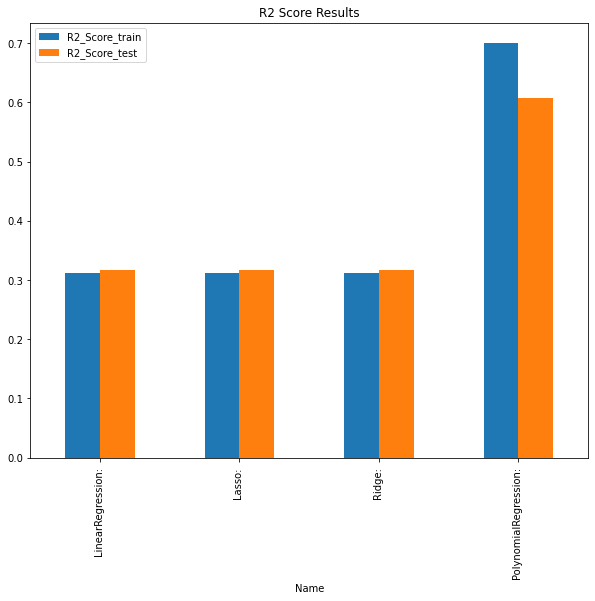

In [96]:
#representing r2 score through bar plot
metrics_df.plot(x="Name", y=['R2_Score_train' , 'R2_Score_test'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8))

Observation-

- From above dataframe we can see LinearRegression is not performing good at all.
- Polynomial Regression is giving r2 value of 0.7 train data and 0.6 for test data.

- By comparing these models polynomial regressor is performing better having high r2 score and MSE, RMSE value is also low for polynomial regression

## Model Explainability
for knowing which feature is important for predicting 

In [97]:
##installing package
!pip install shap

In [98]:
from sklearn.tree import export_graphviz
import shap 
# import graphviz
sns.set_style('darkgrid')

In [99]:
X.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'T5', 'RH_6', 'T7',
       'RH_7', 'T8', 'RH_8', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'hour'],
      dtype='object')

In [100]:
X_train1=pd.DataFrame(X_train1)
X_test1=pd.DataFrame(X_test1)

In [101]:
X_test1.columns=[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'T5', 'RH_6', 'T7',
       'RH_7', 'T8', 'RH_8', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'hour']]

In [102]:
X_train1.columns=[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'T5', 'RH_6', 'T7',
       'RH_7', 'T8', 'RH_8', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'hour']]

In [104]:
# #rf regressor
# rf=RandomForestRegressor(max_depth=23, max_features='log2', min_samples_leaf=3,
#                       min_samples_split=6, n_estimators=73, random_state=10)
 
# # fit the regressor with x and y data
# rf.fit(X_train1, y_train)

In [ ]:
# # Define a tree explainer for the built model
# rf_model=rf
# explainer = shap.TreeExplainer(rf)

In [ ]:
# # Obtain a Scatter Summary Plot 
# shap_values_train = explainer.shap_values(X_train1)

## Conclusion
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).

1) Main aim of the project is to predict energy consumption of Appliances. First we analysed the data but the information from the data set is collected in regular interval of time so it's time series data. We are not implementing time series technique on the model because of less knowledge on time series.

2) Then we used the matplotlib and seaborn to do Exploratory Data Analysis on data by plotting different graphs like scatter-plot, barplot, boxplot, subplot and heat map. From this we got useful insights like:

Many columns in the dataset are not normally distributed and target column is also right skewed.
Dataset has many outliers and no null values.
We have hours column which is highly correlated with dependent variable and there are lot features that have lesser than 0.1 correlation with dependent variable and it is a non linear dataset.
Energy consumption in month of March is high and low in January and the increase in temp leads to more energy consumption.
Decrease in Humidity leads to increase in power consumption. Humidity is inversely proportional to dependent variable i.e Energy Consumption.
Hour of the Day is the most important influencing parameter for Energy consumption.
High Electricity consumption of >140Wh is observed during evening hours 16:00 to 20:00. Weekends (Saturdays and Sundays) also observed high consumption of Electricity. (> 25% than Weekdays)
lights have very low importance as a feature.
3) In feature selection we used variance threshold , f_regression and Pearson correlation matrix and using them we removed features that are not important for predicting dependent variable.

4) In feature engineering technique we removed outliers in our model.

5) Algorithms like Linearregression, Polynomial regression, Decision tree, Random forest, Gradient boosting ,XGBM and LGBM regression are used and cross validation hyperparameter tuning was done on the all models. By comparing all models we found that randomforest regressor performs good having high r2 score and MSE, RMSE value is also low for random forest. Some overfitting is happening because dataset is time series and we are not implementing time series concept.

## Improvemente points:
Definitely, we have a scope of improvement here, specially in the feature engineering.

Data we have in regualr interval of time we can implement time series concept on the data and analyse how the accuracy is varying.

Available data is only for 1 house, we learn important information if we analyse several houses

Features like House geometry, number of people residing at house over time may give few more insights
Positioning and quality of sensors can be analysed for better data capturing

In [ ]:
 In feature selection use variance threshold and F_Regression to select best features

• In feature engineering check null values, removed outliers in the data set.

• use multiple models to predict power consumption did hyper parameters tuning Random Forest regression is best model.

• With model explain ability technique for knowing which features is important